# Importando dependencias, definindo variaveis e etc

In [2]:
import pandas as pd
import pymannkendall as mk
import numpy as np
import matplotlib.pyplot as plt
#import ruptures as rpt

In [3]:
#open data-TEA-municipios-.csv as a df
df_TEA_mun = pd.read_csv("data-out/data-TEA-matriculas.csv")
df_MAT_mun = pd.read_csv("data-out/data-Total_de_matriculas-matriculas.csv")

In [4]:
# First, ensure both dataframes have the same index based on municipality
df_TEA_sorted = df_TEA_mun.set_index('Município')
df_MAT_sorted = df_MAT_mun.set_index('Município')

# Create numeric versions with aligned indices
df_TEA_numeric = df_TEA_sorted.iloc[:, :].apply(pd.to_numeric, errors='coerce')
df_MAT_numeric = df_MAT_sorted.iloc[:, :].apply(pd.to_numeric, errors='coerce')

# Calculate prevalence (TEA/Total enrollments * 10000) with 2 decimal places
# Using align will match the indices properly
df_prevalencia = (df_TEA_numeric / df_MAT_numeric * 10000).round(2)

# Keep only municipalities that have TEA data
#df_prevalencia = df_prevalencia.dropna(how='all')
# Replace zeros and empty values with '-'
#df_prevalencia = df_prevalencia.replace({'': '-', '0': '-', 0: '-'})
print(df_MAT_numeric.sum().sum())
print(df_TEA_numeric.sum().sum())
#export to csv
#df_prevalencia.to_csv("data-out/data-prevalencia-total.csv")
#export to csv
#df_prevalencia.to_csv("data-out/data-prevalencia-total.csv")

480613906.0
2152552.0


In [5]:
# Read state level data
df_TEA_estados = pd.read_csv("data-out/data-TEA-estados.csv")
df_MAT_estados = pd.read_csv("data-out/data-Total_de_matriculas-estados.csv")

# Create numeric versions
df_TEA_estados_numeric = df_TEA_estados.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)
df_MAT_estados_numeric = df_MAT_estados.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)


# Calculate prevalence for states
df_prevalencia_estados = (df_TEA_estados_numeric / df_MAT_estados_numeric * 10000).round(2)

# Set state names as index
df_prevalencia_estados.index = df_TEA_estados['Estado']

In [5]:
results_df = pd.DataFrame(columns=['state', 's', 'p_value', 'trend', 'tau', 'h', 'z'])

for state in df_prevalencia_estados.index:
    # Print sample of input data
    data = df_prevalencia_estados.loc[state].values
    print(f"\nAnalyzing {state}")
    print(f"Data sample: {data[:3]}...{data[-3:]}")

    # Apply test with error handling
    try:
        result = mk.hamed_rao_modification_test(data)
        results_df = results_df.append({
            'state': state,
            's': result.s,
            'p_value': result.p,
            'trend': result.trend,
            'tau': result.Tau,
            'h': result.h,
            'z': result.z
        }, ignore_index=True)
    except Exception as e:
        print(f"Error processing {state}: {str(e)}")

# Display summary statistics to check variation
print("\nSummary Statistics:")
print(results_df[['s', 'tau', 'z']].describe())

# Check for unique values
print("\nUnique values per metric:")
for col in ['s', 'tau', 'z']:
    print(f"{col}: {results_df[col].nunique()} unique values")



Analyzing Acre 
Data sample: [ 4.96  8.54 15.21]...[111.57 166.2  258.63]
Error processing Acre : 'DataFrame' object has no attribute 'append'

Analyzing Alagoas 
Data sample: [4.55 6.14 8.82]...[43.81 66.55 99.26]
Error processing Alagoas : 'DataFrame' object has no attribute 'append'

Analyzing Amapá 
Data sample: [ 9.37 14.63 19.48]...[ 98.9  150.55 233.14]
Error processing Amapá : 'DataFrame' object has no attribute 'append'

Analyzing Amazonas 
Data sample: [ 7.01  9.66 13.71]...[ 49.66  68.07 103.1 ]
Error processing Amazonas : 'DataFrame' object has no attribute 'append'

Analyzing Bahia 
Data sample: [4.25 5.87 8.31]...[ 49.05  70.89 110.09]
Error processing Bahia : 'DataFrame' object has no attribute 'append'

Analyzing Ceará 
Data sample: [ 6.2   9.04 11.86]...[ 80.27 126.11 207.23]
Error processing Ceará : 'DataFrame' object has no attribute 'append'

Analyzing Distrito Federal 
Data sample: [15.74 18.93 20.35]...[ 68.79  91.64 128.31]
Error processing Distrito Federal : 'D

In [7]:
# Define regions
norte = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
nordeste = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
sudeste = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

## Prevalencias de regioes e brasil

In [ ]:
# Fix state names in the index by removing extra spaces
df_prevalencia_estados.index = df_prevalencia_estados.index.str.strip()

# Create a figure with subplots for each region
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Plot each region separately
# Norte
df_prevalencia_estados.loc[norte].T.plot(ax=axes[0,0], legend=True, marker='o')
axes[0,0].set_title('Região Norte', fontsize=14)
axes[0,0].set_xlabel('Ano', fontsize=12)
axes[0,0].set_ylabel('Prevalência por 10.000', fontsize=12)
axes[0,0].legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# Nordeste
df_prevalencia_estados.loc[nordeste].T.plot(ax=axes[0,1], legend=True, marker='o')
axes[0,1].set_title('Região Nordeste', fontsize=14)
axes[0,1].set_xlabel('Ano', fontsize=12)
axes[0,1].set_ylabel('Prevalência por 10.000', fontsize=12)
axes[0,1].legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# Sul
df_prevalencia_estados.loc[sul].T.plot(ax=axes[1,0], legend=True, marker='o')
axes[1,0].set_title('Região Sul', fontsize=14)
axes[1,0].set_xlabel('Ano', fontsize=12)
axes[1,0].set_ylabel('Prevalência por 10.000', fontsize=12)
axes[1,0].legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# Sudeste
df_prevalencia_estados.loc[sudeste].T.plot(ax=axes[1,1], legend=True, marker='o')
axes[1,1].set_title('Região Sudeste', fontsize=14)
axes[1,1].set_xlabel('Ano', fontsize=12)
axes[1,1].set_ylabel('Prevalência por 10.000', fontsize=12)
axes[1,1].legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Centro-Oeste
df_prevalencia_estados.loc[centro_oeste].T.plot(ax=axes[2,0], legend=True, marker='o')
axes[2,0].set_title('Região Centro-Oeste', fontsize=14)
axes[2,0].set_xlabel('Ano', fontsize=12)
axes[2,0].set_ylabel('Prevalência por 10.000', fontsize=12)
axes[2,0].legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2,0].grid(True, linestyle='--', alpha=0.7)

# Hide the empty subplot
axes[2,1].set_visible(False)

plt.tight_layout()
plt.show()



In [8]:
# Fix state names in the index by removing extra spaces
df_prevalencia_estados.index = df_prevalencia_estados.index.str.strip()
df_prevalencia_estados.to_csv("data-out/data-prevalencia-estados.csv")
# Define regions
regions = {
    'North': norte,
    'Northeast': nordeste,
    'South': sul,
    'Southeast': sudeste,
    'Mid-West': centro_oeste
}

# Calculate the mean prevalence for each region and for Brazil
df_prevalencia_regioes = pd.DataFrame()

#df_prevalencia_regioes['Brazil'] = df_prevalencia_estados.mean()

#for region, states in regions.items():
#    df_prevalencia_regioes[region] = df_prevalencia_estados.loc[states].mean()

df_TEA_estados_numeric.index = df_TEA_estados['Estado']
df_MAT_estados_numeric.index  = df_TEA_estados['Estado']

df_TEA_estados_numeric.index = df_TEA_estados_numeric.index.str.strip()
df_MAT_estados_numeric.index = df_MAT_estados_numeric.index.str.strip()

df_prevalencia_regioes['Brazil'] = (df_TEA_estados_numeric.sum() / df_MAT_estados_numeric.sum() * 10000).round(2)

for region, states in regions.items():
    df_prevalencia_regioes[region] = (df_TEA_estados_numeric.loc[states].sum() / df_MAT_estados_numeric.loc[states].sum() * 10000).round(2)
    
#df_prevalencia_PTC_estados.loc[states].mean()

In [9]:
df_prevalencia_regioes

,Brazil,North,Northeast,South,Southeast,Mid-West
2014,8.23,6.24,5.21,8.73,11.05,7.24
2015,10.63,8.56,7.23,11.27,13.78,9.16
2016,13.94,11.99,9.75,15.09,17.61,11.63
2017,18.38,16.26,13.97,19.73,22.39,15.16
2018,24.68,21.66,19.69,26.65,29.49,19.68
2019,37.18,38.51,41.89,49.99,29.74,32.99
2020,52.18,47.05,49.21,61.63,54.45,41.79
2021,63.08,55.79,58.48,77.98,65.47,52.71
2022,90.65,81.02,87.43,110.68,91.38,76.38
2023,134.49,125.41,137.79,161.26,129.01,114.79


### Grafico regioes e Brasil prevalencia

In [ ]:
# Create figure with new dimensions
plt.figure(figsize=(12, 8))

# Define line styles for different regions
line_styles = [
    {'linestyle': (0, (5, 1)), 'color': '0.5'},
    {'linestyle': '-', 'color': '0.0'},      # solid black
    {'linestyle': '--', 'color': '0.2'},     # dashed dark gray
    {'linestyle': ':', 'color': '0.4'},      # dotted medium gray
    {'linestyle': '-.', 'color': '0.6'},     # dash-dot light gray
    {'linestyle': (0, (3, 1, 1, 1)), 'color': '0.3'},  # custom dash pattern
    {'linestyle': '-', 'color': '0.0'}         # custom dash pattern
]



# Plot each region and Brazil with different line styles
for i, (region, data) in enumerate(df_prevalencia_regioes.items()):
    plt.plot(data.index.astype(str), data.values, 
             label=region,
             **line_styles[i])

# Customize the plot
#plt.title('Prevalência de TEA por 10.000 Matrículas - Brasil e Regiões', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor =(0.5,-0.2),loc='lower center', ncol=3, fontsize=12)

plt.tight_layout()
plt.show()

In [38]:

df_prevalencia_regioes = df_prevalencia_regioes.T
print(df_prevalencia_regioes)

      Brazil   North  Northeast   South  Southeast  Mid-West
2014    8.23    6.24       5.21    8.73      11.05      7.24
2015   10.63    8.56       7.23   11.27      13.78      9.16
2016   13.94   11.99       9.75   15.09      17.61     11.63
2017   18.38   16.26      13.97   19.73      22.39     15.16
2018   24.68   21.66      19.69   26.65      29.49     19.68
2019   37.18   38.51      41.89   49.99      29.74     32.99
2020   52.18   47.05      49.21   61.63      54.45     41.79
2021   63.08   55.79      58.48   77.98      65.47     52.71
2022   90.65   81.02      87.43  110.68      91.38     76.38
2023  134.49  125.41     137.79  161.26     129.01    114.79


<Figure size 2000x800 with 0 Axes>

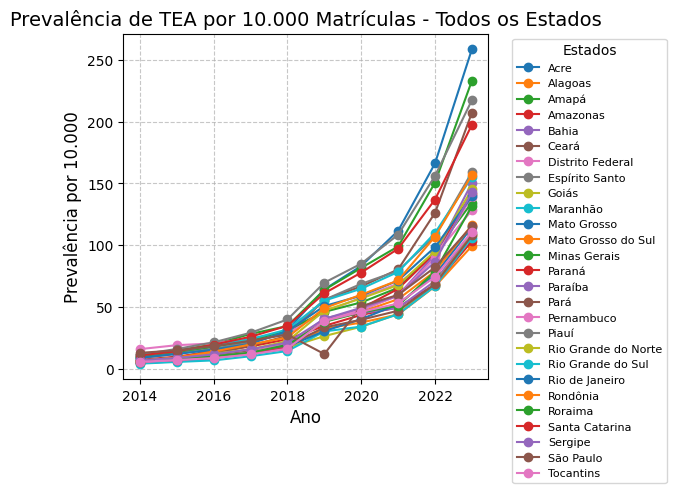

In [7]:
# Create a figure with a wider size
plt.figure(figsize=(20, 8))

# Plot data for all states
df_prevalencia_estados.T.plot(legend=True, marker='o')

# Customize the plot
plt.title('Prevalência de TEA por 10.000 Matrículas - Todos os Estados', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Prevalência por 10.000', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

plt.show()

# Mann Kendall para estados

In [14]:
results = {}
validation_stats = {}
print(df_prevalencia_estados)
for state in df_prevalencia_estados.index:
    try:
        # Extrair os dados para o estado específico
        data = df_prevalencia_estados.loc[state].astype(float).values
       
        # Validar dados de entrada
        if len(data) < 2:
            print(f"Aviso: Dados insuficientes para o estado {state}")
            continue
           
        # Armazenar estatísticas de validação
        validation_stats[state] = {
            'mean': np.mean(data),
            'std': np.std(data),
            'n': len(data)
        }
       
        # Aplicar o teste de Hamed-Rao
        result = mk.hamed_rao_modification_test(data, alpha=0.05)
        results[state] = result
        
    except Exception as e:
        print(f"Erro ao processar o estado {state}: {str(e)}")
        continue
print(results)


                      2014   2015   2016   2017   2018   2019   2020    2021  \
Estado                                                                         
Acre                  4.96   8.54  15.21  21.92  30.94  64.10  83.10  111.57   
Alagoas               4.55   6.14   8.82  12.75  17.20  32.21  37.27   43.81   
Amapá                 9.37  14.63  19.48  28.03  34.44  63.79  81.54   98.90   
Amazonas              7.01   9.66  13.71  17.86  23.74  34.51  43.44   49.66   
Bahia                 4.25   5.87   8.31  11.84  15.84  40.43  44.86   49.05   
Ceará                 6.20   9.04  11.86  18.53  26.43  55.71  66.51   80.27   
Distrito Federal     15.74  18.93  20.35  24.54  28.67  45.71  57.49   68.79   
Espírito Santo       11.30  15.86  21.24  28.96  39.74  69.55  84.95  108.41   
Goiás                 5.16   6.78   9.29  12.75  16.98  26.27  33.89   44.21   
Maranhão              3.96   5.35   6.60   9.97  14.19  30.06  34.00   44.00   
Mato Grosso           5.28   6.91  10.08

# Mann Kendall regioes

In [ ]:
results_regioes = {}
validation_stats_regioes = {}

for state in df_prevalencia_regioes.index:
    try:
        # Extrair os dados para o estado específico
        data = df_prevalencia_regioes.loc[state].astype(float).values
       
        # Validar dados de entrada
        if len(data) < 2:
            print(f"Aviso: Dados insuficientes para o estado {state}")
            continue
           
        # Armazenar estatísticas de validação
        validation_stats[state] = {
            'mean': np.mean(data),
            'std': np.std(data),
            'n': len(data)
        }
       
        # Aplicar o teste de Hamed-Rao
        result = mk.hamed_rao_modification_test(data, alpha=0.05)
        results_regioes[state] = result
        
    except Exception as e:
        print(f"Erro ao processar o estado {state}: {str(e)}")
        continue


{'Brazil': Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=np.True_, p=np.float64(8.303070332638107e-05), z=np.float64(3.9354796403996297), Tau=np.float64(1.0), s=np.float64(45.0), var_s=125.0, slope=np.float64(11.175), intercept=np.float64(-19.3575)), 'North': Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=np.True_, p=np.float64(8.303070332638107e-05), z=np.float64(3.9354796403996297), Tau=np.float64(1.0), s=np.float64(45.0), var_s=125.0, slope=np.float64(9.3475), intercept=np.float64(-11.978749999999998)), 'Northeast': Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=np.True_, p=np.float64(8.303070332638107e-05), z=np.float64(3.9354796403996297), Tau=np.float64(1.0), s=np.float64(45.0), var_s=125.0, slope=np.float64(10.713333333333333), intercept=np.float64(-17.42)), 'South': Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=np.True_, p=np.float64(8.303070332638107e-05), z=np.float64(3.9354796403996297), Ta

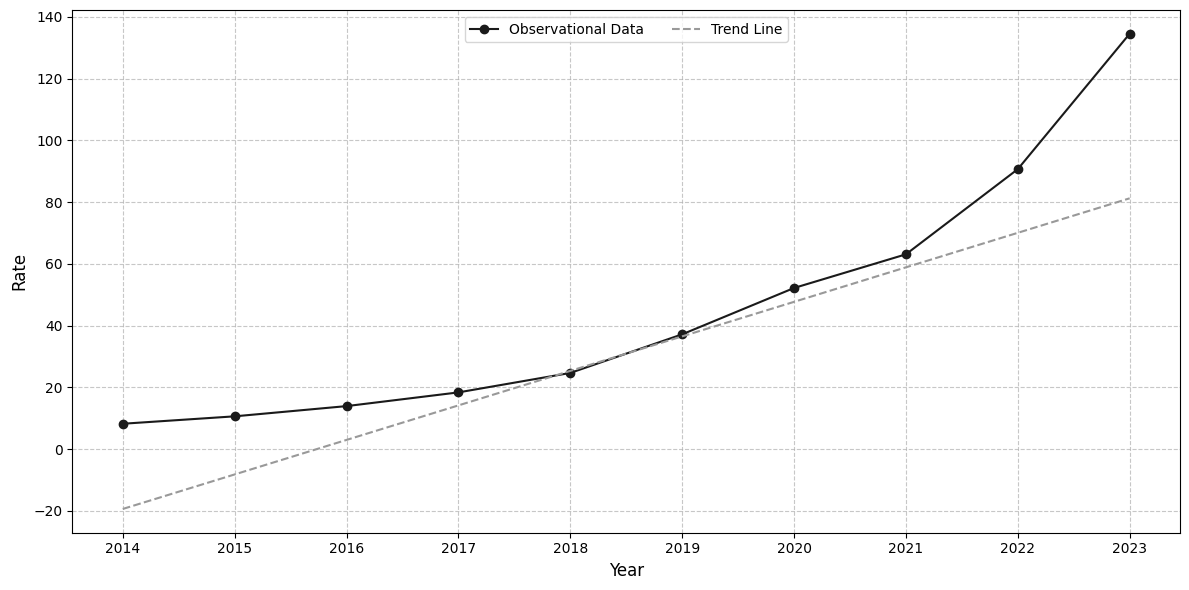

In [8]:
# Grafico Brasil e trend line
data_brasil = df_prevalencia_regioes['Brazil'].values

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Apply Mann-Kendall test
res = mk.hamed_rao_modification_test(data_brasil)

trend_line = np.arange(len(data_brasil)) * res.slope + res.intercept

# Plot observed data and trend line
ax.plot(df_prevalencia_regioes.index, data_brasil, 'o-',color='0.1', label='Observational Data')
ax.plot(df_prevalencia_regioes.index, trend_line, '--',color='0.6', label='Trend Line')

# Customize the plot
#ax.set_title('Análise de Tendência - Brasil', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate', fontsize=12)
#ax.legend(loc='best')

ax.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper center', ncol=2, fontsize=10)
plt.tight_layout()
plt.show()

# Gerando tabelas

In [65]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Estado','Prev_2014', 'Prev_2023', 'Trend', 'p-value', 'Tau', 'S', 'z', 'h'])

# Populate the DataFrame with the results
for state, result in results.items():
    estado = state.strip()
    if result.p < 0.05:
        estado += '*'
        
    # Get prevalence values for 2014 and 2023
    prev_2014 = df_prevalencia_estados.loc[state.strip(), '2014']
    prev_2023 = df_prevalencia_estados.loc[state.strip(), '2023']
    var_perc = ((prev_2023 - prev_2014) / prev_2014 * 100).round(2)
    
    new_row = pd.DataFrame({
        'Estado': [estado],
        'Trend': [result.trend],
        'p-value': [round(result.p, 3) if result.p >= 0.001 else '>0.001'],
        'Sen-value': [round(result.slope, 2)],
        'Tau': [round(result.Tau, 2)],
        'S': [result.s],
        'z': [round(result.z, 2)],
        'h': [result.h],
        'Prev_2014': [prev_2014],
        'Prev_2023': [prev_2023],
        'Var_perc': [round(var_perc, 2)],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Export to CSV with legend
with open('data-out/mann-kendall-results.csv', 'w', encoding='utf-8') as f:
    results_df.to_csv(f, index=False)
    f.write('\n* Estados com p-valor < 0.05 são considerados significativos.')

# Display the DataFrame
print(results_df)
# Set font to Times New Roman

                  Estado  Prev_2014  Prev_2023       Trend p-value   Tau  \
0                  Acre*       4.96     258.63  increasing  >0.001  1.00   
1               Alagoas*       4.55      99.26  increasing  >0.001  1.00   
2                 Amapá*       9.37     233.14  increasing  >0.001  1.00   
3              Amazonas*       7.01     103.10  increasing  >0.001  1.00   
4                 Bahia*       4.25     110.09  increasing  >0.001  1.00   
5                 Ceará*       6.20     207.23  increasing  >0.001  1.00   
6      Distrito Federal*      15.74     128.31  increasing  >0.001  1.00   
7        Espírito Santo*      11.30     217.39  increasing  >0.001  1.00   
8                 Goiás*       5.16     108.43  increasing  >0.001  1.00   
9              Maranhão*       3.96     106.06  increasing  >0.001  1.00   
10          Mato Grosso*       5.28     114.45  increasing  >0.001  1.00   
11   Mato Grosso do Sul*       5.81     116.25  increasing  >0.001  1.00   
12         M

/tmp/ipykernel_1315/2580004248.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [19]:
results_df = pd.DataFrame(columns=['Estado','Prev_2014', 'Prev_2023', 'Trend', 'p-value', 'Tau', 'S', 'z', 'h'])

# Populate the DataFrame with the results
for state, result in results_regioes.items():
    estado = state.strip()
    if result.p < 0.05:
        estado += '*'
        
    # Get prevalence values for 2014 and 2023
    prev_2014 = df_prevalencia_regioes.loc[state.strip(), '2014']
    prev_2023 = df_prevalencia_regioes.loc[state.strip(), '2023']
    var_perc = ((prev_2023 - prev_2014) / prev_2014 * 100).round(2)
    
    new_row = pd.DataFrame({
        'Estado': [estado],
        'Trend': [result.trend],
        'p-value': [round(result.p, 3) if result.p >= 0.001 else '>0.001'],
        'Sen-value': [round(result.slope, 2)],
        'Tau': [round(result.Tau, 2)],
        'S': [result.s],
        'z': [round(result.z, 2)],
        'h': [result.h],
        'Prev_2014': [round(prev_2014, 2)],
        'Prev_2023': [round(prev_2023, 2)],
        'Var_perc': [round(var_perc, 2)],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Export to CSV with legend
#with open('data-out/mann-kendall-results-regioes.csv', 'w', encoding='utf-8') as f:
#    results_df.to_csv(f, index=False)
#    f.write('\n* Estados com p-valor < 0.05 são considerados significativos.')
results_df.to_excel("data-out/mann-kendall-results-regioes-TAXACONCERTADA.xlsx")
# Display the DataFrame
print(results_df)

       Estado  Prev_2014  Prev_2023       Trend p-value  Tau     S     z  \
0     Brazil*       8.23     134.49  increasing  >0.001  1.0  45.0  3.94   
1      North*       6.24     125.41  increasing  >0.001  1.0  45.0  3.94   
2  Northeast*       5.21     137.79  increasing  >0.001  1.0  45.0  3.94   
3      South*       8.73     161.26  increasing  >0.001  1.0  45.0  3.94   
4  Southeast*      11.05     129.01  increasing  >0.001  1.0  45.0  3.94   
5   Mid-West*       7.24     114.79  increasing  >0.001  1.0  45.0  3.94   

      h  Sen-value  Var_perc  
0  True      11.18   1534.14  
1  True       9.35   1909.78  
2  True      10.71   2544.72  
3  True      14.00   1747.19  
4  True      10.69   1067.51  
5  True       8.92   1485.50  


/tmp/ipykernel_2059/1951642321.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [ ]:
#plt.rcParams['font.family'] = 'Times New Roman'

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 15))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=results_df.values, 
                 colLabels=results_df.columns,
                 loc='center',
                 cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Add divider lines and adjust column widths
for i, key in enumerate(table._cells):
    cell = table._cells[key]
    
    # Add bottom line for header row
    if key[0] == 0:
        cell.visible_edges = 'B'
        
    # Adjust width for specific columns
    if key[1] in [5, 6, 7]:  # S, z, h columns
        cell.set_width(0.05)
    else:
        cell.set_width(0.1)
        
    # Remove cell edges except for header row
    if key[0] != 0:
        cell.set_edgecolor('none')

plt.tight_layout()
plt.show()


# Vendo Pontos de Ruptura na tendencia

In [ ]:
anos = np.arange(2014, 2023)


data = df_prevalencia_regioes['Brazil'].values
model = rpt.Dynp(model="l2").fit(data)
change_point = model.predict(n_bkps=1)  # Apenas um ponto de mudanç

print(f"Ponto de mudança detectado: {2014 + change_point[0]}")

# Plotando a série com o ponto de mudança detectado



Ponto de mudança detectado: 2019


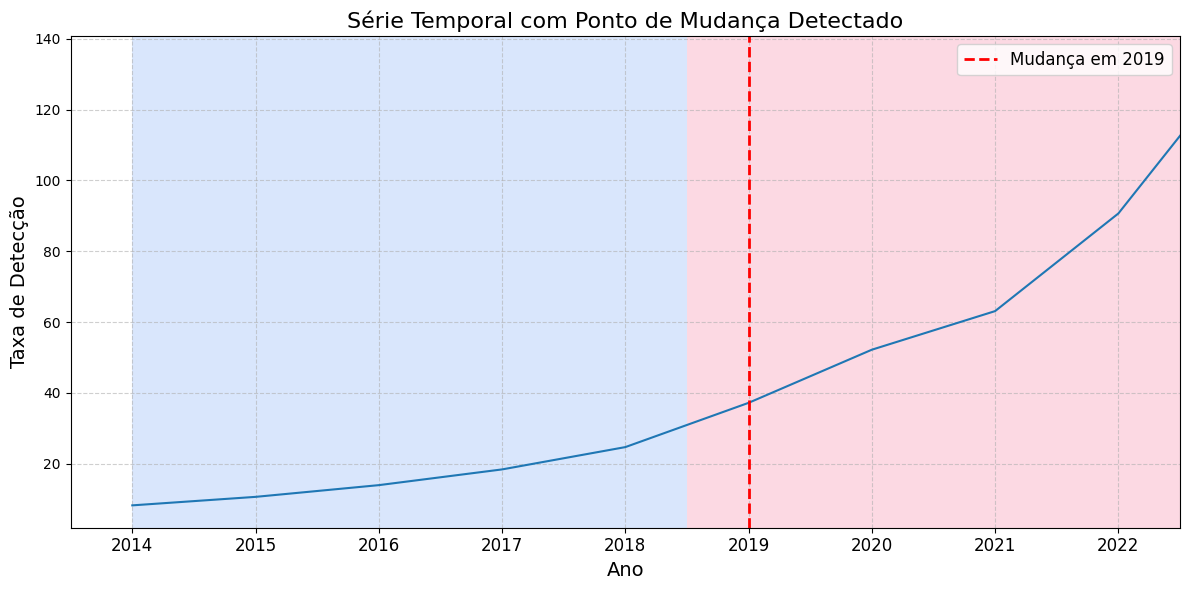

In [83]:
fig, ax = rpt.display(data, change_point, figsize=(12, 6))
if isinstance(ax, list):
    ax = ax[0]

# Definindo os ticks do eixo X com base no número de observações e atribuindo os anos reais
ax.set_xticks(np.arange(len(anos)))
ax.set_xticklabels(anos, fontsize=12)

# Ajustando os limites do eixo X para centralizar os pontos (de -0.5 a n - 0.5)
ax.set_xlim(-0.5, len(anos)-0.5)

# Configurando rótulos e título com melhor formatação
ax.set_xlabel("Ano", fontsize=14)
ax.set_ylabel("Taxa de Detecção", fontsize=14)
ax.set_title("Série Temporal com Ponto de Mudança Detectado", fontsize=16)

# Adicionando uma linha vertical para o ponto de mudança (usando o índice, que agora está bem alinhado)
for cp in change_point:
    if cp < len(anos):
        ax.axvline(x=cp, color='red', linestyle='--', linewidth=2, label=f'Mudança em {anos[cp]}')

# Evitando legendas duplicadas
handles, labels = ax.get_legend_handles_labels()
unique_handles = []
unique_labels = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_handles.append(h)
        unique_labels.append(l)
if unique_handles:
    ax.legend(unique_handles, unique_labels, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Joinpoint detectado em: 2020.7


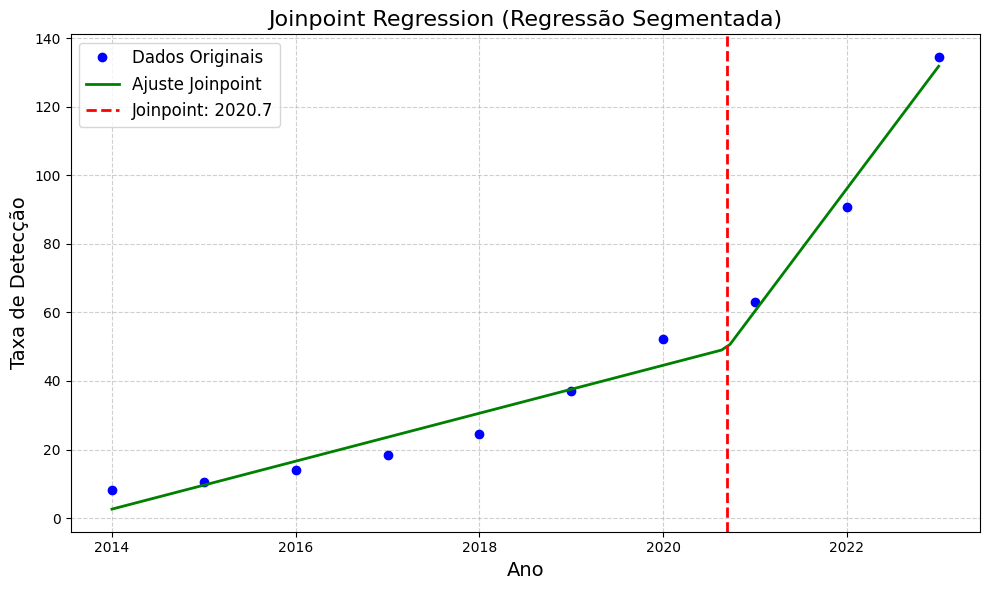

In [95]:
import pwlf  # Instale com: pip install pwlf

# Exemplo: dados anuais de 2014 a 2022 (9 observações)
anos = np.arange(2014, 2024)

# Simulação dos dados: os primeiros 4 anos com uma tendência (média baixa)
# e os 5 anos seguintes com uma tendência mais alta.

data = df_prevalencia_regioes['Brazil'].values

# Ajustando o modelo joinpoint (piecewise linear fit) com 2 segmentos (1 joinpoint)
my_pwlf = pwlf.PiecewiseLinFit(anos, data)
# Forçamos a divisão em 2 segmentos; isso ajustará um joinpoint.
breaks = my_pwlf.fit(2)

# 'breaks' é um array com os limites dos segmentos: 
# breaks[0] é o início, breaks[1] é o joinpoint e breaks[2] é o final.
joinpoint = breaks[1]
print(f"Joinpoint detectado em: {joinpoint:.1f}")

# Gerando a linha ajustada (para uma visualização suave)
x_hat = np.linspace(anos[0], anos[-1], 100)
y_hat = my_pwlf.predict(x_hat)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos, data, 'o', color='blue', label="Dados Originais")
plt.plot(x_hat, y_hat, '-', color='green', linewidth=2, label="Ajuste Joinpoint")
# Traçando a linha vertical para indicar o joinpoint
plt.axvline(x=joinpoint, color='red', linestyle='--', linewidth=2,
            label=f'Joinpoint: {joinpoint:.1f}')
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Taxa de Detecção", fontsize=14)
plt.title("Joinpoint Regression (Regressão Segmentada)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [91]:
def pettitt_test(data):
    """
    Realiza o teste de Pettitt em uma série temporal e retorna:
      - K: o índice do breakpoint (ponto em que ocorre a maior mudança)
      - p_value: o p-valor associado à mudança
      - U: a série de estatísticas U_t calculadas (útil para análise adicional)
    """
    n = len(data)
    # Calcula os ranks dos valores
    ranks = rankdata(data)
    U = np.zeros(n-1)
    # Calcula a estatística U_t para cada ponto t (de 1 a n-1)
    for t in range(1, n):
        U[t-1] = 2 * np.sum(ranks[:t]) - t * (n + 1)
    # Encontra o índice em que a mudança (em valor absoluto) é máxima
    K = np.argmax(np.abs(U))
    # Cálculo aproximado do p-valor
    p_value = 2 * np.exp((-6 * (U[K] ** 2)) / (n**3 + n**2))
    return K, p_value, U

# Exemplo de aplicação:
# Suponha que temos dados anuais (uma observação por ano) de 2014 a 2022.
anos = np.arange(2014, 2024)

data = df_prevalencia_regioes['Brazil'].values

# Executa o teste de Pettitt na série
break_index, p_val, U_values = pettitt_test(data)

print(f"Ponto de mudança detectado no índice {break_index} que corresponde ao ano {anos[break_index]}")
print(f"p-valor: {p_val:.5f}")

Ponto de mudança detectado no índice 4 que corresponde ao ano 2018
p-valor: 0.06614


In [92]:
print(np.arange(2014, 2023))

[2014 2015 2016 2017 2018 2019 2020 2021 2022]


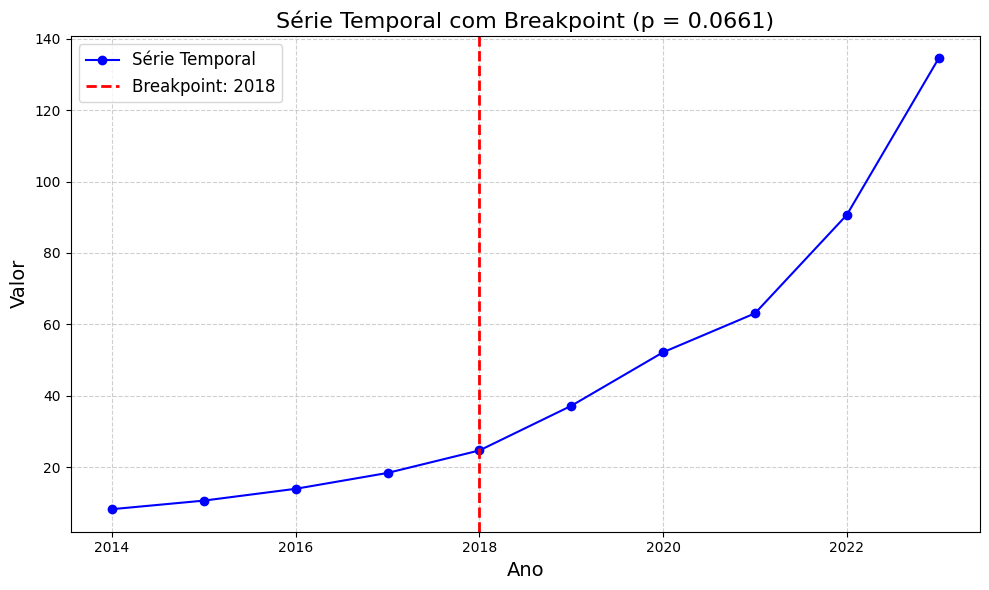

In [93]:


# Plotando a série temporal e marcando o breakpoint com uma linha vertical tracejada
plt.figure(figsize=(10, 6))
plt.plot(anos, data, marker='o', linestyle='-', color='blue', label='Série Temporal')
plt.axvline(x=anos[break_index], color='red', linestyle='--', linewidth=2,
            label=f'Breakpoint: {anos[break_index]}')
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.title(f"Série Temporal com Breakpoint (p = {p_val:.4f})", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()